# chemical maps

This notebooks has simple workflows with chemical X-ray data obtained with an electron probe microanalyzer (EMPA), with both EDS (energy-dispersive) and WDS (wavelength-dispersive) spectometers. 

Data is from a high-grade _crd-grt granulite with spl-sill_ from the **Araçuaí Orogen**, SE Brazil.

Worklows are:
* load and display individual X-ray maps
* train a machine-learning model to classify minerals
* load mineral chemistry standards and use a cluster algorithm to classify all pixels

---

to do
* read and review
* setup analysis


In [21]:
# importing libs
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mine
from src.utils import get_dirs
from src.xray import XrayMap

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

In [ ]:
# loading dirs that might be used
get_dirs()

In [ ]:
# setting up plots
plt.rcParams["figure.figsize"] = (16,8)

In [7]:
# starting chemical variables

ELEMENTS = ["Al","Ba","Ca","Cl","Cr","Fe","K","Mg","Mn","Mn","Na","P","S","Si","Ti","Zn","Zr"]

In [2]:
el = "Al"
data = pd.DataFrame(columns=[1,2], data=[[10,20]])

a = XrayMap(element="al", xray_data=data)

In [3]:
a.dimensions

(1, 2)

In [23]:
# load X-Ray maps

def load_maps():
  """
  Function that read all x-ray maps from a specific dir. 
  It returns a list for numpy arrays, scaled to 255 and ready from diplay with plt.imgshow().

  In this example, X-ray maps are csv files without headers, have intensities as integers 
  and are located on DATA_DIR.
  """

  maps = []
  for el in ELEMENTS:
    try:
      # print('{a}.csv'.format(a=el))
      df_el = pd.read_csv(os.path.join(get_dirs()["DATA_DIR"], '{element}.csv'.format(element=el)), dtype="Int64", header=None)

      map_el = XrayMap(element=el, xray_data=df_el)
      
      maps.append(map_el)
      print('{a}.csv found!'.format(a=el))
    except:
      print("error loading map")

  # maps_np = [x.to_numpy().astype(np.float32) / 255.0 for x.xray_data in maps]
  
  for x in maps:
    x.xray_data = x.xray_data.to_numpy().astype(np.float32) / 255.0

  return maps

xray_maps = load_maps()

Al.csv found!
Ba.csv found!
Ca.csv found!
Cl.csv found!
Cr.csv found!
Fe.csv found!
K.csv found!
Mg.csv found!
Mn.csv found!
Mn.csv found!
Na.csv found!
P.csv found!
S.csv found!
Si.csv found!
Ti.csv found!
Zn.csv found!
Zr.csv found!


In [24]:
for map in xray_maps:
    print(map.element)

Al
Ba
Ca
Cl
Cr
Fe
K
Mg
Mn
Mn
Na
P
S
Si
Ti
Zn
Zr


In [25]:
xray_maps[0].xray_data

array([[24.541176 , 23.945099 , 23.52549  , ..., 14.57647  , 15.172549 ,
        14.592156 ],
       [24.09804  , 24.137255 , 24.305882 , ..., 14.756863 , 14.784314 ,
        14.639215 ],
       [22.843138 , 23.701962 , 24.658823 , ..., 14.541177 , 15.505882 ,
        14.415687 ],
       ...,
       [14.780392 , 14.439216 , 15.       , ...,  9.909804 , 10.270588 ,
        10.521568 ],
       [14.709804 , 14.572549 , 14.494118 , ..., 13.09804  , 10.501961 ,
        11.384314 ],
       [14.3294115, 14.6784315, 14.592156 , ..., 14.870588 , 14.811765 ,
        14.192157 ]], dtype=float32)

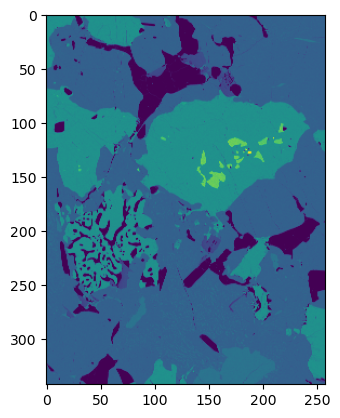

In [26]:
plt.imshow(xray_maps[0].xray_data)
plt.show()

In [ ]:
np.stack([df_Al, df_Fe], axis=-1).shape

In [ ]:
df_al_fe = np.stack([df_Al, df_Fe, df_Mg, df_Si, true_grt], axis=-1)
print(df_al_fe.shape)

In [ ]:
df_good = pd.DataFrame(df_al_fe.reshape(-1, df_al_fe.shape[-1]), columns=["Al","Fe","Mg","Si", "flGrt"])
df_good_labeled = df_good[df_good.flGrt == 1]


* ML

In [ ]:
# creating a fake mask to 

true_grt = np.zeros(maps_np[0].shape)
true_grt[50:70,220:255] = 1
plt.imshow(true_grt)
plt.show()

In [ ]:
X = df_good_labeled[["Al", "Fe", "Mg", "Si"]]
y = df_good_labeled["flGrt"].astype(int)

model = LogisticRegression()
model_forest = IsolationForest()
model_forest.fit(X)

In [ ]:
df_to_predict = df_good.drop(columns=["flGrt"], inplace=False)

In [ ]:
plt.imshow(model_forest.predict(df_to_predict).reshape(342, 258))